In [1]:
from SPEECHCOMMANDS import SPEECHCOMMANDS
import matplotlib.pyplot as plt
import librosa.display
from torch import nn
from torchaudio import transforms

In [5]:
n_mels = 128
mfcc = transforms.MFCC(sample_rate=16000, n_mfcc=64, log_mels=True, melkwargs={'n_mels': n_mels, 'power': 1, 'normalized': True})
mel = transforms.MelSpectrogram(
            sample_rate=16000, n_mels = 64, f_max=5000)
amp2db = transforms.AmplitudeToDB()
transform = nn.Sequential(transforms.TimeMasking(
    time_mask_param=25), transforms.FrequencyMasking(freq_mask_param=15), transforms.FrequencyMasking(freq_mask_param=15))
train = SPEECHCOMMANDS(
    root='./', subset='testing', download=True, transform=transform)

c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\torchaudio\functional\functional.py:507: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(
100%|██████████| 2.26G/2.26G [05:15<00:00, 7.69MB/s]


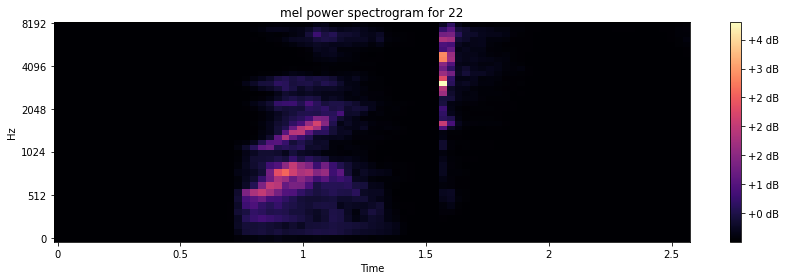

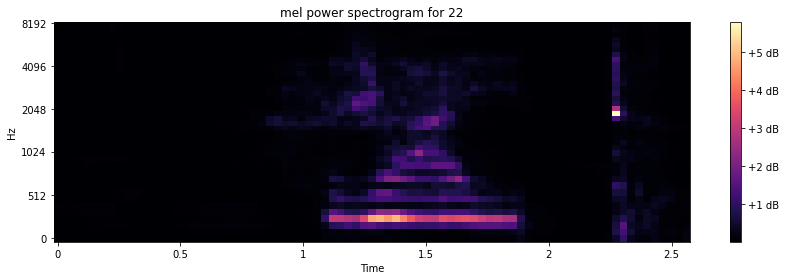

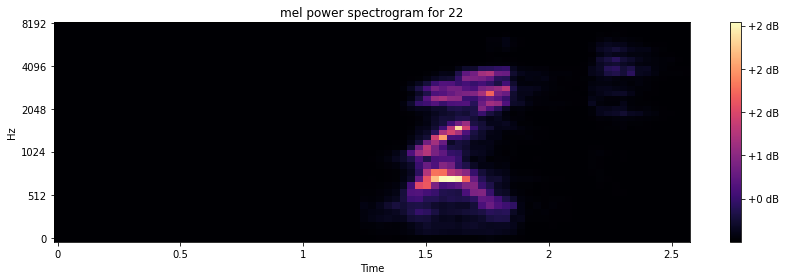

In [6]:
for i in range(3):
    spec = train[i][0].squeeze().numpy()
    plt.figure(figsize=(12,4))
    librosa.display.specshow(spec, sr=16000, x_axis='time', y_axis='mel')
    plt.title(f'mel power spectrogram for {train[0][1]}')
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
    plt.show()